In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.feature_extraction.text import CountVectorizer
from sentiment_data import read_sentiment_examples, WordEmbeddings, read_word_embeddings
from torch.utils.data import Dataset, DataLoader
import time
import argparse
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from BOWmodels import SentimentDatasetBOW, NN2BOW, NN3BOW
from DANmodels import SentimentDatasetDAN, DAN

## Test DAN

In [2]:
import os
train_data = os.path.join("data", "train.txt")
dev_data = os.path.join("data", "dev.txt")

# Load the training and development data
train_exs = read_sentiment_examples(train_data)
dev_exs = read_sentiment_examples(dev_data)

train_exs

[['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'century', "'s", 'new', '``', 'conan', "''", 'and', 'that', 'he', "'s", 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'arnold', 'schwarzenegger', ',', 'jean-claud', 'van', 'damme', 'or', 'steven', 'segal', '.']; label=1,
 ['the', 'gorgeously', 'elaborate', 'continuation', 'of', '``', 'the', 'lord', 'of', 'the', 'rings', "''", 'trilogy', 'is', 'so', 'huge', 'that', 'a', 'column', 'of', 'words', 'can', 'not', 'adequately', 'describe', 'co-writer\\/director', 'peter', 'jackson', "'s", 'expanded', 'vision', 'of', 'j.r.r.', 'tolkien', "'s", 'middle-earth', '.']; label=1,
 ['singer\\/composer', 'bryan', 'adams', 'contributes', 'a', 'slew', 'of', 'songs', '--', 'a', 'few', 'potential', 'hits', ',', 'a', 'few', 'more', 'simply', 'intrusive', 'to', 'the', 'story', '--', 'but', 'the', 'whole', 'package', 'certainly', 'captures', 'the', 'intended', ',', 'er', ',', 'spirit', 'of', 'the', 'piece', '.']; label=1,
 ['yet

In [3]:
train_data = SentimentDatasetBOW("data/train.txt")
dev_data = SentimentDatasetBOW("data/dev.txt")
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(dev_data, batch_size=16, shuffle=False)

for x, y in train_loader:
    print(x, y)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])


In [4]:
examples = read_sentiment_examples("data/train.txt")
sentences = [" ".join(ex.words) for ex in examples]
sentences

["the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .",
 "the gorgeously elaborate continuation of `` the lord of the rings '' trilogy is so huge that a column of words can not adequately describe co-writer\\/director peter jackson 's expanded vision of j.r.r. tolkien 's middle-earth .",
 'singer\\/composer bryan adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .',
 'yet the act is still charming here .',
 "whether or not you 're enlightened by any of derrida 's lectures on `` the other '' and `` the self , '' derrida is an undeniably fascinating and playful fellow .",
 'just the labour involved in creating the layered richness of the imagery in this chiaroscuro of madness and light is astonishing .',
 'part of the charm of 

In [5]:
# Load dataset
start_time = time.time()

word_embeddings = read_word_embeddings("data/glove.6B.50d-relativized.txt")
train_data = SentimentDatasetDAN("data/train.txt", word_embeddings)
dev_data = SentimentDatasetDAN("data/dev.txt", word_embeddings)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(dev_data, batch_size=16, shuffle=False)


Read in 14923 vectors of size 50


In [6]:
for x, y in train_loader:
    print(x, y)
    break

tensor([[    8,     2,     1,   193,     3,     2,   287,     5,    27,     2,
          2929,  4556,     8,     2,  1445,    26,    52,    29,    28, 10713,
          1892,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [ 2775,     7,  5005, 10579,   869,     5,     1,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [   81,  2069,     9,   287,    70,  2167,    64,     3,     7,  2167,
            64,    16,  6595,  6062,     4,     0,     0,     0,     0,     0,
    

In [7]:
word_embeddings.word_indexer.get_object(-1)

In [8]:
import numpy as np
x=np.array([1, 2, 3, 4, 5]).astype(np.float32)
x[[1, 3]] += 1 + x[[1, 3]]
x

array([1., 5., 3., 9., 5.], dtype=float32)

In [9]:
sentence = [" ".join(ex.words) for ex in examples][0]
word_indices = [word_embeddings.word_indexer.index_of(word) for word in sentence.split()]
word_indices

[2,
 922,
 15,
 5476,
 6,
 29,
 2,
 3296,
 508,
 10,
 48,
 27,
 -1,
 26,
 7,
 13,
 19,
 10,
 203,
 6,
 149,
 9,
 7215,
 141,
 1128,
 70,
 -1,
 -1,
 3,
 -1,
 1167,
 -1,
 44,
 -1,
 -1,
 4]

In [10]:
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.feature_extraction.text import CountVectorizer
from sentiment_data import read_sentiment_examples, WordEmbeddings, read_word_embeddings
from torch.utils.data import Dataset, DataLoader
import time
import argparse
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from BOWmodels import SentimentDatasetBOW, NN2BOW, NN3BOW
from DANmodels import SentimentDatasetDAN, DAN

In [11]:
train_data = SentimentDatasetDAN("data/train.txt", None)
dev_data = SentimentDatasetDAN("data/dev.txt", None)

AttributeError: 'NoneType' object has no attribute 'word_indexer'

In [19]:
train_data.sentences_idx[0], len(train_data.sentences_idx[0])

(tensor([ 0,  1,  2,  3,  4,  5,  0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  8,
         16,  4, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 52)

In [16]:
word_embeddings = read_word_embeddings("data/glove.6B.300d-relativized.txt")
train_data = SentimentDatasetDAN("data/train.txt", word_embeddings)

Read in 14923 vectors of size 300


In [20]:
train_data.sentences_idx[0], len(train_data.sentences_idx[0])

(tensor([ 0,  1,  2,  3,  4,  5,  0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  8,
         16,  4, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]),
 52)

## Test BPE

In [12]:
import re, collections 
def get_stats (vocab): 
    pairs = collections.defaultdict (int) 
    for word, freq in vocab.items (): 
        symbols = word.split() 
        for i in range (len (symbols) -1): 
            pairs[symbols[i],symbols[i+1]] += freq 
    return pairs 
def merge_vocab (pair, v_in): 
    v_out = {}
    bigram = re.escape (' '.join(pair)) 
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)') 
    for word in v_in: 
        w_out = p.sub (''. join(pair), word) 
        v_out [w_out] = v_in[word] 
    return v_out 

vocab = {'1 o w </w>' : 5, '1 o w e r </w>' : 2, 'n e w e s t </w>':6, 'w i d e s t </w>':3} 
num_merges = 10
for i in range (num_merges) : 
    pairs = get_stats (vocab) 
    best = max(pairs, key=pairs.get) 
    vocab = merge_vocab (best, vocab) 
    print (best)

('e', 's')
('es', 't')
('est', '</w>')
('1', 'o')
('1o', 'w')
('n', 'e')
('ne', 'w')
('new', 'est</w>')
('1ow', '</w>')
('w', 'i')


In [13]:
from collections import defaultdict, Counter

# Helper function to get pairs of adjacent symbols in a word
def get_pairs(word):
    """Return set of symbol pairs in a word."""
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs

# Function to merge the most frequent pair
def merge_vocab(pair, v_in):
    """Replace all occurrences of the most frequent pair in the vocabulary."""
    v_out = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in v_in:
        new_word = word.replace(bigram, replacement)
        v_out[new_word] = v_in[word]
    return v_out

# BPE algorithm implementation
def bpe(sentences, num_merges):
    """Apply BPE on a list of sentences."""
    
    # Step 1: Create initial vocabulary where words are split into characters
    vocab = defaultdict(int)
    for sentence in sentences:
        for word in sentence.split():
            # Add a space between characters for BPE processing, and treat as vocabulary
            vocab[' '.join(list(word)) + ' </w>'] += 1
    
    # Step 2: Iterate to apply BPE merges
    for i in range(num_merges):
        # Get frequency of all symbol pairs
        pairs = defaultdict(int)
        for word, freq in vocab.items():
            word_pairs = get_pairs(word.split())
            for pair in word_pairs:
                pairs[pair] += freq
        
        # Find the most frequent pair
        if not pairs:
            break
        most_frequent_pair = max(pairs, key=pairs.get)
        
        # Step 3: Merge the most frequent pair in the vocabulary
        vocab = merge_vocab(most_frequent_pair, vocab)
    
    # Return the final vocabulary
    return vocab


# Example usage
sentences = [
    "low",
    "lowest",
    "newer",
    "wider"
]

# Apply BPE with 10 merges
final_vocab = bpe(sentences, 10)

# Print the final vocabulary
for word in final_vocab:
    print(word, final_vocab[word])


low</w> 1
lowest</w> 1
n ew er</w> 1
w i d er</w> 1


In [14]:
sentences = ["What is the airspeed velocity of an unladen swallow ?",
                "What if I went to the store and bought some milk ?"]
vocab = defaultdict(int)
for sentence in sentences:
    words = sentence.strip().split()
    for word in words:
        word = ' '.join(list(word)) + ' </w>'
        vocab[word] += 1
vocab

defaultdict(int,
            {'W h a t </w>': 2,
             'i s </w>': 1,
             't h e </w>': 2,
             'a i r s p e e d </w>': 1,
             'v e l o c i t y </w>': 1,
             'o f </w>': 1,
             'a n </w>': 1,
             'u n l a d e n </w>': 1,
             's w a l l o w </w>': 1,
             '? </w>': 2,
             'i f </w>': 1,
             'I </w>': 1,
             'w e n t </w>': 1,
             't o </w>': 1,
             's t o r e </w>': 1,
             'a n d </w>': 1,
             'b o u g h t </w>': 1,
             's o m e </w>': 1,
             'm i l k </w>': 1})

In [15]:
from collections import defaultdict

class BPE:
    def __init__(self, vocab_size=5):
        self.vocab_size = vocab_size
        self.bpe_codes = {}
        self.reverse_vocab = {}

    def fit(self, sentences):
        # Initialize vocabulary with character-level tokens
        vocab = defaultdict(int)
        for sentence in sentences:
            words = sentence.strip().split()
            for word in words:
                word = ' '.join(list(word)) + ' </w>'
                vocab[word] += 1

        # Learn BPE codes
        for _ in range(self.vocab_size - len(vocab)):
            pairs = self.get_stats(vocab)
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            vocab = self.merge_vocab(best_pair, vocab)
            self.bpe_codes[best_pair] = len(self.bpe_codes)

        self.reverse_vocab = {v: k for k, v in enumerate(vocab.keys())}

    def get_stats(self, vocab):
        pairs = defaultdict(int)
        for word, freq in vocab.items():
            symbols = word.split()
            for i in range(len(symbols) - 1):
                pairs[symbols[i], symbols[i + 1]] += freq
        return pairs

    def merge_vocab(self, pair, vocab):
        new_vocab = {}
        bigram = ' '.join(pair)
        replacement = ''.join(pair)
        for word, freq in vocab.items():
            new_word = word.replace(bigram, replacement)
            print(new_word)
            new_vocab[new_word] = freq
        return new_vocab

    def encode(self, word):
        word = ' '.join(list(word)) + ' </w>'
        while True:
            pairs = self.get_stats({word: 1})
            if not pairs:
                break
            best_pair = max(pairs, key=pairs.get)
            if best_pair not in self.bpe_codes:
                break
            word = word.replace(' '.join(best_pair), ''.join(best_pair))
        return word.split()

    def tokenize(self, sentence):
        return [self.encode(word) for word in sentence.split()]
# Example usage:
bpe = BPE(vocab_size=10)
bpe.fit(["your training sentences here"])
tokens = bpe.tokenize("your test sentence here")
bpe.reverse_vocab

y o u r </w>
t r a in in g </w>
s e n t e n c e s </w>
h e r e </w>
y o u r </w>
t r a in in g </w>
s en t en c e s </w>
h e r e </w>
yo u r </w>
t r a in in g </w>
s en t en c e s </w>
h e r e </w>
you r </w>
t r a in in g </w>
s en t en c e s </w>
h e r e </w>
your </w>
t r a in in g </w>
s en t en c e s </w>
h e r e </w>
your</w>
t r a in in g </w>
s en t en c e s </w>
h e r e </w>


{'your</w>': 0,
 't r a in in g </w>': 1,
 's en t en c e s </w>': 2,
 'h e r e </w>': 3}

## Report


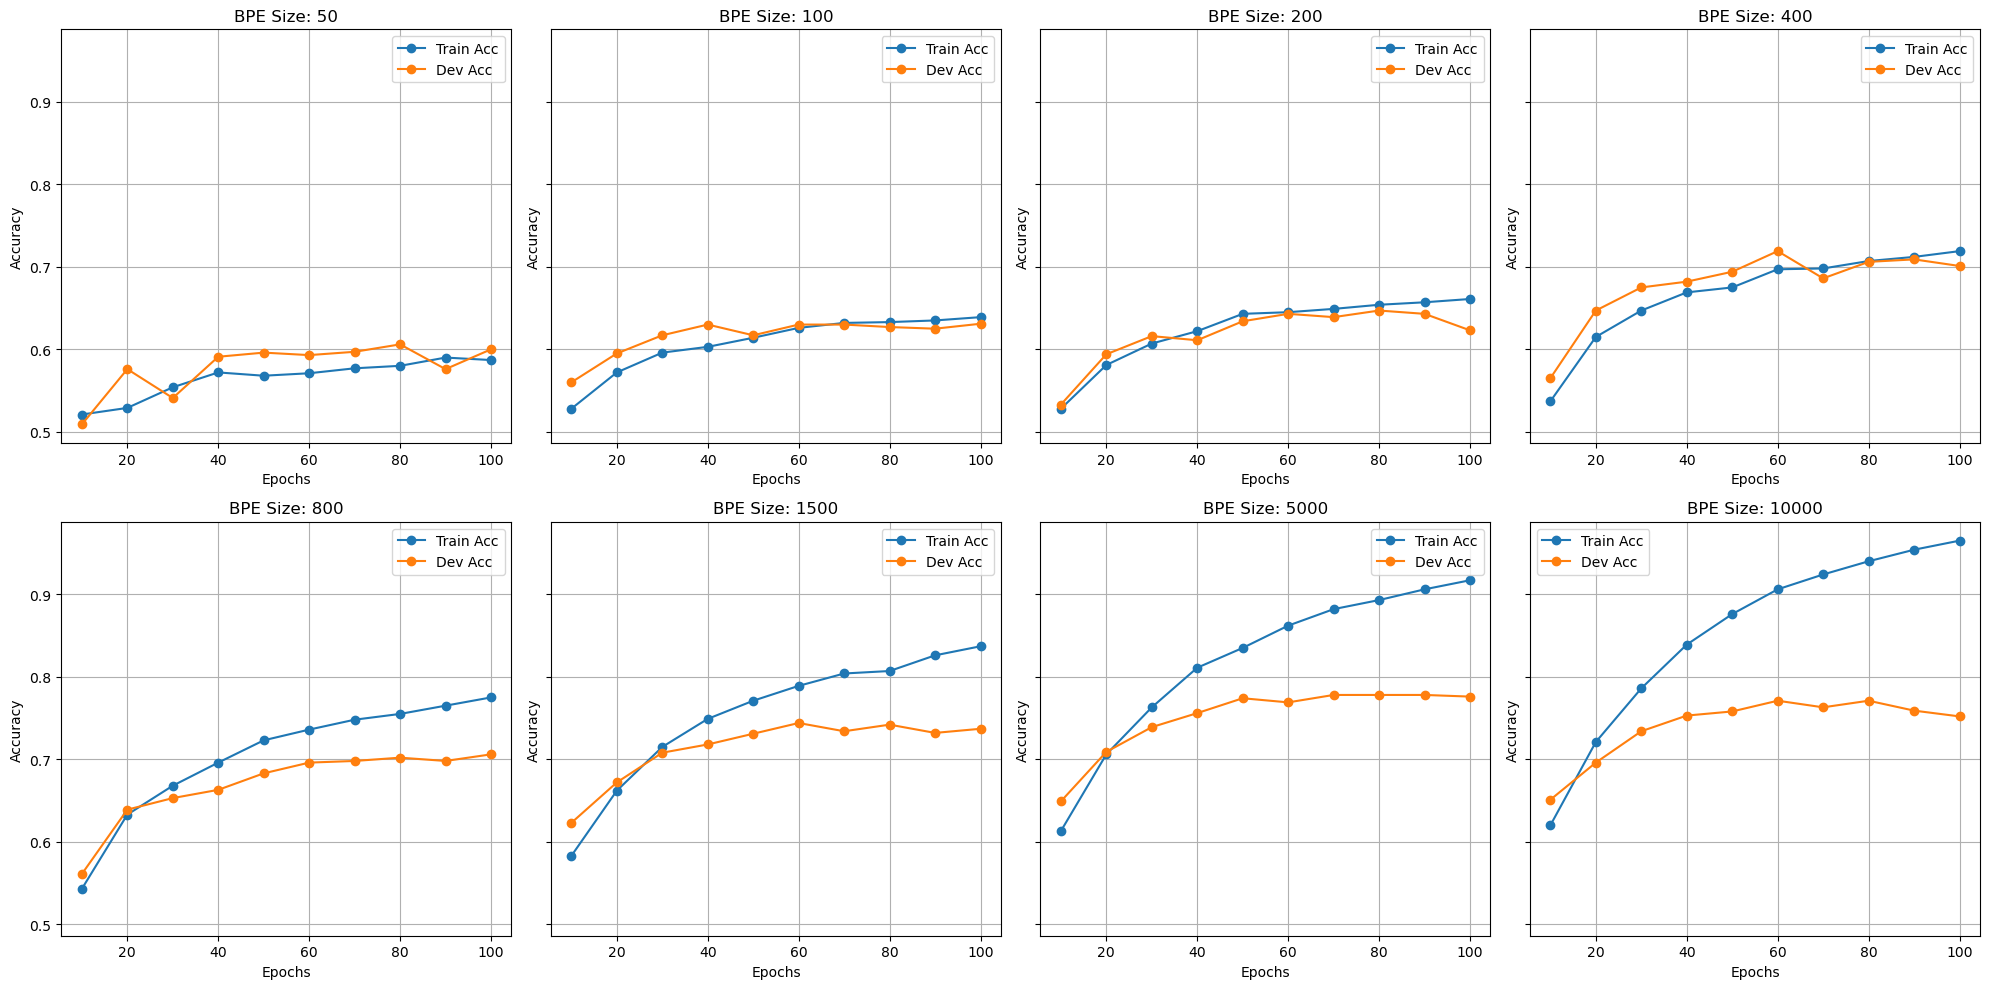

In [17]:
import matplotlib.pyplot as plt

# BPE vocab sizes
bpe_sizes = [50, 100, 200, 400, 800, 1500, 5000, 10000]

# Train accuracies for each BPE size
train_accuracies = [
    [0.521, 0.529, 0.554, 0.572, 0.568, 0.571, 0.577, 0.580, 0.590, 0.587],
    [0.528, 0.572, 0.596, 0.603, 0.614, 0.626, 0.632, 0.633, 0.635, 0.639],
    [0.528, 0.581, 0.607, 0.622, 0.643, 0.645, 0.649, 0.654, 0.657, 0.661],
    [0.537, 0.615, 0.647, 0.669, 0.675, 0.697, 0.698, 0.707, 0.712, 0.719],
    [0.543, 0.633, 0.668, 0.696, 0.723, 0.736, 0.748, 0.755, 0.765, 0.775],
    [0.583, 0.662, 0.715, 0.749, 0.771, 0.789, 0.804, 0.807, 0.826, 0.837],
    [0.613, 0.706, 0.763, 0.811, 0.835, 0.862, 0.882, 0.893, 0.906, 0.917],
    [0.620, 0.721, 0.786, 0.839, 0.876, 0.906, 0.924, 0.940, 0.954, 0.965]
]

# Dev accuracies for each BPE size
dev_accuracies = [
    [0.509, 0.576, 0.541, 0.591, 0.596, 0.593, 0.597, 0.606, 0.576, 0.600],
    [0.560, 0.595, 0.617, 0.630, 0.617, 0.630, 0.630, 0.627, 0.625, 0.631],
    [0.533, 0.594, 0.616, 0.611, 0.634, 0.643, 0.639, 0.647, 0.643, 0.623],
    [0.565, 0.647, 0.675, 0.682, 0.694, 0.719, 0.686, 0.706, 0.709, 0.701],
    [0.561, 0.639, 0.653, 0.663, 0.683, 0.696, 0.698, 0.702, 0.698, 0.706],
    [0.623, 0.672, 0.708, 0.718, 0.731, 0.744, 0.734, 0.742, 0.732, 0.737],
    [0.649, 0.709, 0.739, 0.756, 0.774, 0.769, 0.778, 0.778, 0.778, 0.776],
    [0.651, 0.696, 0.734, 0.753, 0.758, 0.771, 0.763, 0.771, 0.759, 0.752]
]

# Number of epochs
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
axs = axs.ravel()

# Plot each BPE size
for i, size in enumerate(bpe_sizes):
    axs[i].plot(epochs, train_accuracies[i], label='Train Acc', marker='o')
    axs[i].plot(epochs, dev_accuracies[i], label='Dev Acc', marker='o')
    axs[i].set_title(f'BPE Size: {size}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Accuracy')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

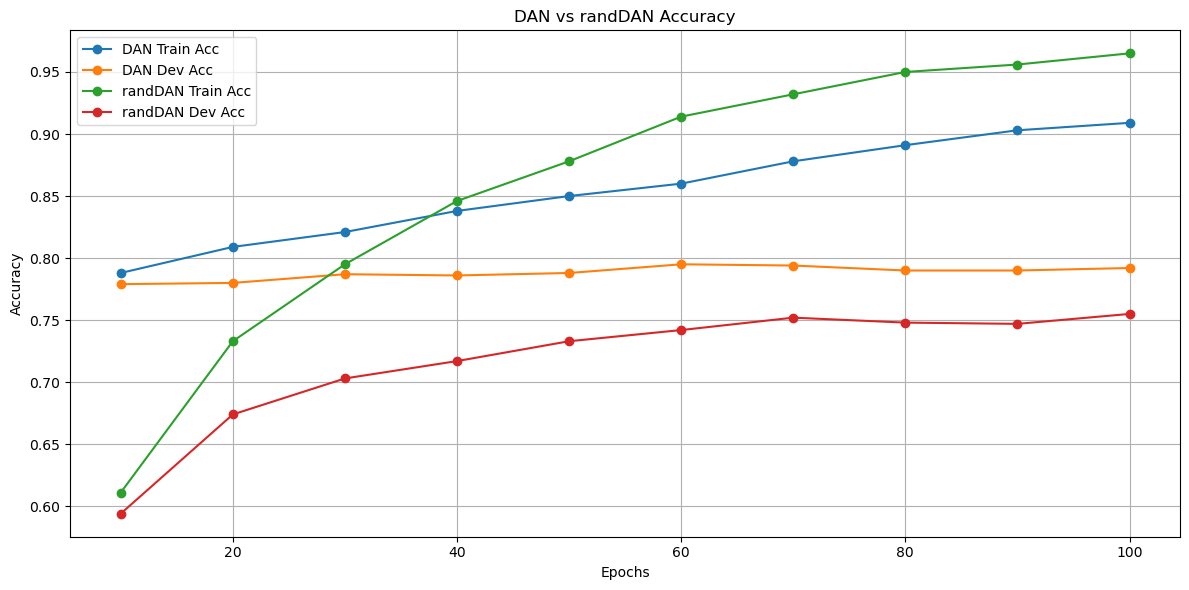

In [18]:
import matplotlib.pyplot as plt

# Epochs
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# DAN with GloVe results
dan_train_acc = [0.788, 0.809, 0.821, 0.838, 0.850, 0.860, 0.878, 0.891, 0.903, 0.909]
dan_dev_acc = [0.779, 0.780, 0.787, 0.786, 0.788, 0.795, 0.794, 0.790, 0.790, 0.792]

# DAN with random embeddings results
randdan_train_acc = [0.611, 0.733, 0.795, 0.846, 0.878, 0.914, 0.932, 0.950, 0.956, 0.965]
randdan_dev_acc = [0.594, 0.674, 0.703, 0.717, 0.733, 0.742, 0.752, 0.748, 0.747, 0.755]

# Create plot
plt.figure(figsize=(12, 6))

# Plot DAN results
plt.plot(epochs, dan_train_acc, label='DAN Train Acc', marker='o')
plt.plot(epochs, dan_dev_acc, label='DAN Dev Acc', marker='o')

# Plot randDAN results
plt.plot(epochs, randdan_train_acc, label='randDAN Train Acc', marker='o')
plt.plot(epochs, randdan_dev_acc, label='randDAN Dev Acc', marker='o')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('DAN vs randDAN Accuracy')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

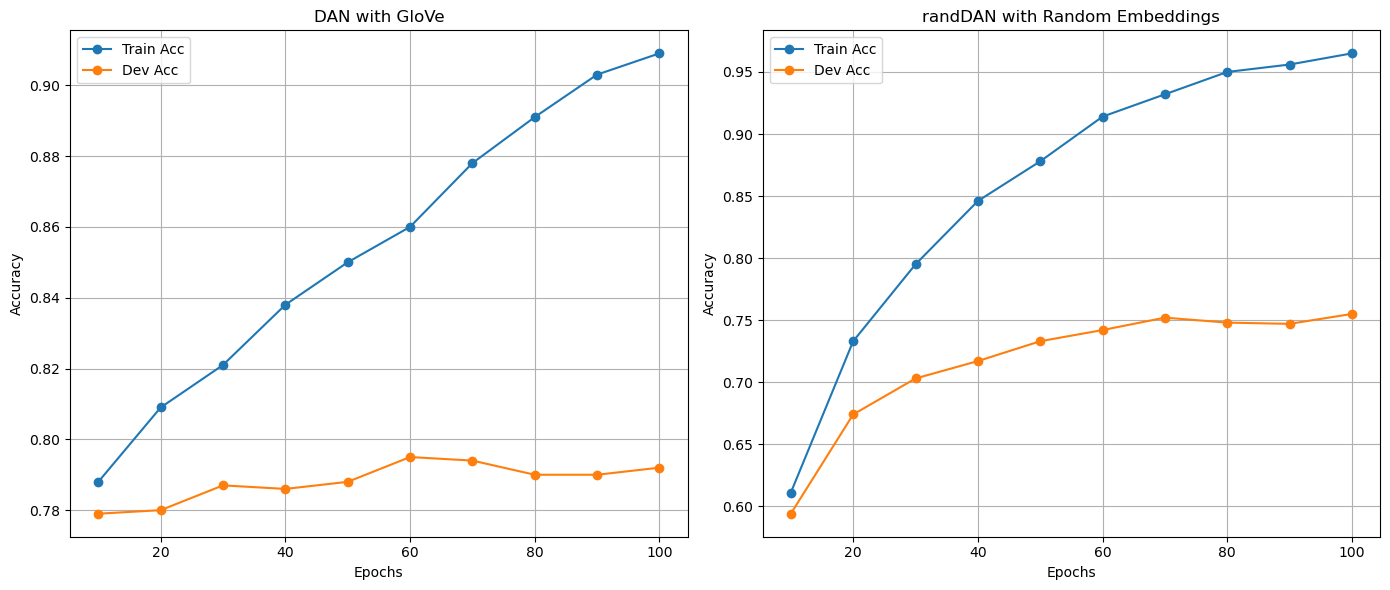

In [19]:
import matplotlib.pyplot as plt

# Epochs
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# DAN with GloVe results
dan_train_acc = [0.788, 0.809, 0.821, 0.838, 0.850, 0.860, 0.878, 0.891, 0.903, 0.909]
dan_dev_acc = [0.779, 0.780, 0.787, 0.786, 0.788, 0.795, 0.794, 0.790, 0.790, 0.792]

# DAN with random embeddings results
randdan_train_acc = [0.611, 0.733, 0.795, 0.846, 0.878, 0.914, 0.932, 0.950, 0.956, 0.965]
randdan_dev_acc = [0.594, 0.674, 0.703, 0.717, 0.733, 0.742, 0.752, 0.748, 0.747, 0.755]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot DAN results
axs[0].plot(epochs, dan_train_acc, label='Train Acc', marker='o')
axs[0].plot(epochs, dan_dev_acc, label='Dev Acc', marker='o')
axs[0].set_title('DAN with GloVe')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot randDAN results
axs[1].plot(epochs, randdan_train_acc, label='Train Acc', marker='o')
axs[1].plot(epochs, randdan_dev_acc, label='Dev Acc', marker='o')
axs[1].set_title('randDAN with Random Embeddings')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()